# Fitting a resonator measured in reflection

In [1]:
## Make better way of importing the individual function (This not a very good way)
#%cd D:\Github\rf-analysis-tools\src\resonator
%cd C:\Users\DebopamDatta\Documents\Softwares\rf-analysis-tools\src

C:\Users\DebopamDatta\Documents\Softwares\rf-analysis-tools\src


C:\Users\DebopamDatta\anaconda3\envs\rf-analysis-env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [7]:

from resonator import circuit
import numpy as np
import pandas as pd
from IPython.display import display
import numpy as np
import xarray as xr
import holoviews as hv
import os
from qcodes import initialise_or_create_database_at, load_by_run_spec, initialised_database_at
import pandas as pd
import qcodes as qc

## Database file reading

#### Although we could use the resonator tools to load data, here we want to use the Pandas library, which is used for statistical data analysis. It can handle many different file types including hdf5.

In [14]:
db_address = "C:\\Users\\DebopamDatta\\Documents\\c12_data"
cooldown_date = "2025-09-12" 
database_file_name = "2025-09-12-C12-036-E-C12-036-C.db"
initialise_or_create_database_at(os.path.join(db_address,cooldown_date,database_file_name))
print(os.path.join(db_address,cooldown_date,database_file_name))
# peak1 = load_by_run_spec(captured_run_id=2).to_xarray_dataset()

C:\Users\DebopamDatta\Documents\c12_data\2025-09-12\2025-09-12-C12-036-E-C12-036-C.db


In [16]:
peak1 = load_by_run_spec(captured_run_id=24).to_xarray_dataset().sel({'pna_power':-40})

Pandas has a very nice way of displaying the data. Let's look at the first few entries:

In [17]:
display(peak1.head())

<xarray.Dataset> Size: 208B
Dimensions:                   (pna_frequency_axis: 5)
Coordinates:
    pna_power                 float64 8B -40.0
  * pna_frequency_axis        (pna_frequency_axis) float64 40B 5.127e+09 ... ...
Data variables:
    pna_tr1_linear_magnitude  (pna_frequency_axis) float64 40B 2.333 ... 2.32
    pna_tr1_magnitude         (pna_frequency_axis) float64 40B 7.357 ... 7.308
    pna_tr1_phase             (pna_frequency_axis) float64 40B -66.45 ... -67.26
    pna_tr1_unwrapped_phase   (pna_frequency_axis) float64 40B -66.45 ... -67.26
Attributes: (12/21)
    ds_name:                                   from 5.1268Ghz to 5.1318Ghz , ...
    sample_name:                               C12-036-E
    exp_name:                                  S21-RF_switch_port-2+Qinu_input8
    snapshot:                                  {"station": {"instruments": {"...
    guid:                                      33ab3ccf-0000-0000-0000-019940...
    run_timestamp:                             2025-09-13 04:41:33
    ...                                        ...
    dep_params:                                pna_tr1_phase, pna_tr1_unwrapp...
    git_hash:                                  56d6a6a54d4512f6c259e729054f68...
    main_pna_2D_MxCsweep_multifrequencies:     from instruments.rf.pamela imp...
    main_pna_2D_pnapower_multifrequencies:     from instruments.rf.pamela imp...
    main_pna_fixed_multifrequency:             from instruments.rf.pamela imp...
    multiple_device_pna_fixed_multifrequency:  from instruments.rf.pamela imp...

Next, we define a reflection port measurement and add the data.

In [5]:
# port2 = circuit.reflection_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=10**(
#     np.log10(((peak1["R"].values / np.sqrt(2)) ** 2 * 1000) / 50))
#     * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )
# port2 = circuit.reflection_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["R"]/2
#         * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )

# # port2 = circuit.reflection_port(
# #     f_data=peak1["readoutpulsefrequency"].values,
# #     z_data_raw=peak1["I"].values - 1j * peak1["Q"].values,
# # )
# # hv.Curve((peak1["I"].values, peak1["Q"].values), kdims=["I"], vdims=["Q"])
# hv.Curve(
#     (peak1["readoutpulsefrequency"].values, 10 * np.log10((((peak1["R"].values / np.sqrt(2)) ** 2) * 1000) / 50)),
#     kdims=["readoutpulsefrequency"], vdims=["Power (dBm)"]
# )

In [18]:
port2 = circuit.reflection_port(
    f_data=peak1["pna_frequency_axis"],
    z_data_raw=peak1["pna_tr1_linear_magnitude"]
    * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"] / 180),
)

In [19]:
# hv.Curve((peak1["I"].values, peak1["Q"].values), kdims=["I"], vdims=["Q"])

Perform an automated fit.

In [20]:
port2.autofit()

C:\Users\DebopamDatta\Documents\Softwares\rf-analysis-tools\src\resonator\circlefit.py:148: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  x0 = spopt.fsolve(func, 0., fprime=d_func)


Let's plot the data and the fit!

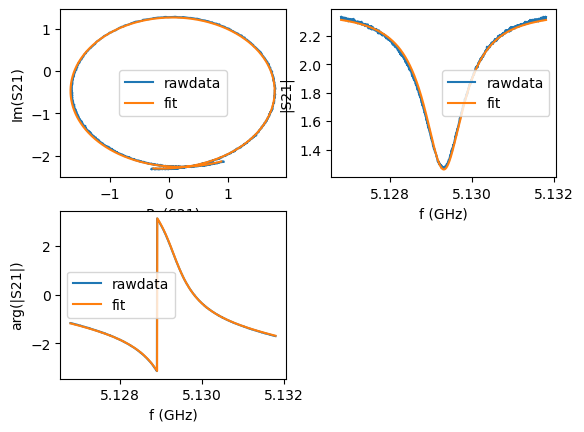

In [21]:
port2.plotall()

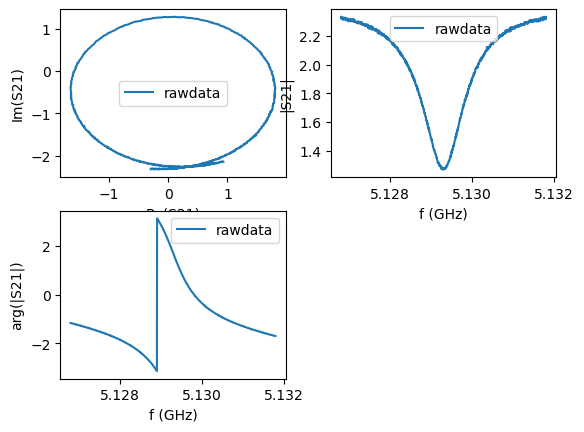

In [22]:
port2.plotrawdata()

In [11]:
# port2.circlefit(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data=peak1["I"].values - 1j * peak1["Q"].values,
# )

AttributeError: Axes.set() got an unexpected keyword argument 'axisbg'

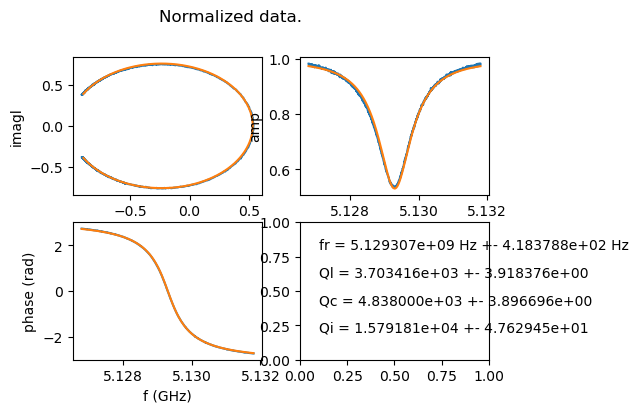

In [23]:
port2.GUIfit()

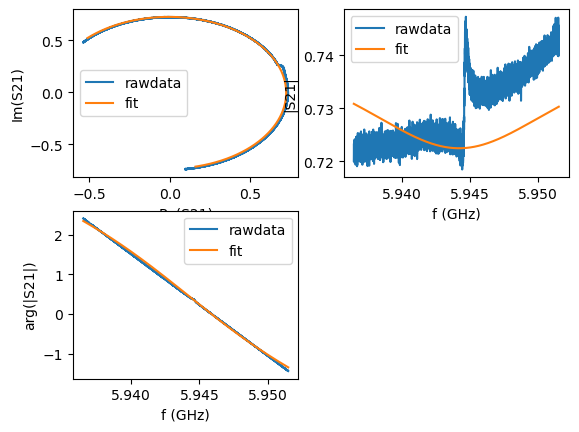

In [96]:
port2.plotall()

In [24]:
display(pd.DataFrame([port2.fitresults]).map(lambda x: "{0:.2e}".format(x)))

,Qi,Qc,Ql,fr,theta0,Ql_err,Qc_err,fr_err,chi_square,Qi_err
0,1.58e+04,4.84e+03,3.70e+03,5.13e+09,-5.67e-03,3.92e+00,3.90e+00,4.18e+02,1.01e-04,4.76e+01


In [25]:
print("Single photon limit: %.2f dBm" % port2.get_single_photon_limit())

Single photon limit: -140.15 dBm


In [ ]:
print(
    "At -100dBm, we have %.2e photons in the resonator"
    % port2.get_photons_in_resonator(-100)
)

In [10]:
initialise_or_create_database_at(
    r"D:\Github\Qinu\qumin\data\2025-08-29-C12-036-J-C12-037-AA.db"
)
# pea

In [29]:
# port3 = circuit.notch_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["I"].values - 1j * peak1["Q"].values,
# )
# print()
# port3 = circuit.notch_port(
#     f_data=peak1["readoutpulsefrequency"].values,
#     z_data_raw=peak1["R"].values 
#     * np.exp(1j * np.pi * peak1["Phi"] / 180),
# )
peak1 = load_by_run_spec(captured_run_id=31).to_xarray_dataset().sel({'pna_power':-30})

In [31]:
port3 = circuit.notch_port(
    f_data=peak1["pna_frequency_axis"],
    z_data_raw=peak1["pna_tr1_linear_magnitude"]
    * np.exp(1j * np.pi * peak1["pna_tr1_unwrapped_phase"] / 180),
)

In [33]:
port3.autofit()

In [161]:
# port3.circlefit(
#  f_data=peak1["readoutpulsefrequency"].values ,
#  z_data=peak1["I"].values - 1j * peak1["Q"].values,
# fr=None,Ql=None,refine_results=True,calc_errors=True)


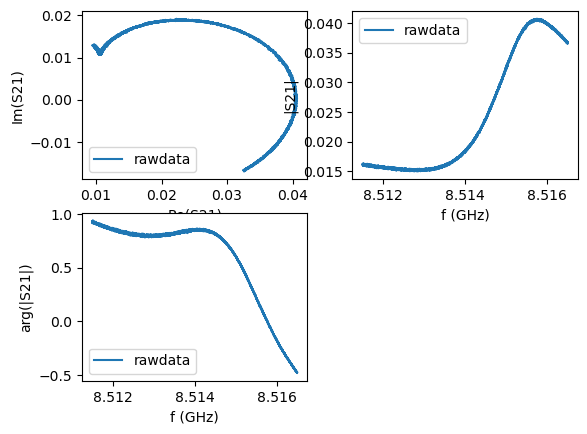

In [34]:
 # port3.do_calibration(
 #     f_data=peak1["readoutpulsefrequency"].values,
 #     z_data=peak1["I"].values - 1j * peak1["Q"].values,
 # )
port3.plotrawdata()

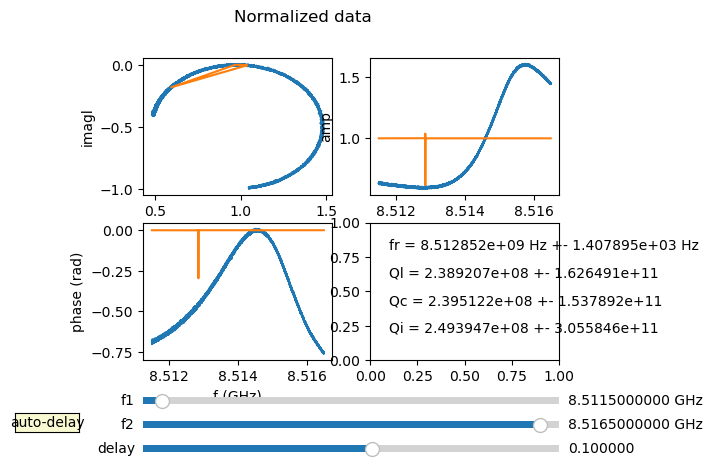

In [35]:
port3.GUIfit()

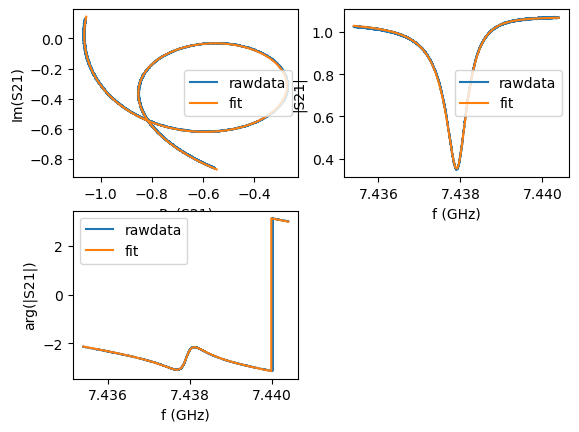

In [17]:
port3.plotall()

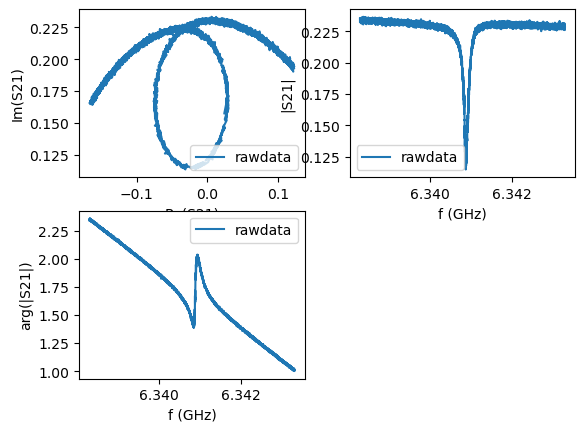

In [18]:
port3.plotrawdata()

Next, let us have a look at the fit results. Here, we convert the dictionary of results into a dataframe to display it in a nicer way.

In [19]:
display(pd.DataFrame([port3.fitresults]).map(lambda x: "{0:.2e}".format(x)))

,fr,Qi_dia_corr,Qi_no_corr,absQc,Qc_dia_corr,Ql,theta0,phi0,phi0_err,Ql_err,absQc_err,fr_err,chi_square,Qi_no_corr_err,Qi_dia_corr_err
0,6.34e+09,9.38e+04,9.47e+04,1.02e+05,1.03e+05,4.91e+04,3.00e+00,-1.42e-01,1.03e-02,7.06e+02,6.81e+02,8.39e+02,1.34e-03,2.55e+03,2.48e+03


In [15]:
print("Single photon limit: %.2f dBm" % port3.get_single_photon_limit())

Single photon limit: -140.44 dBm


In [16]:
print(
    "At -120dBm, we have %.2e photons in the resonator"
    % port3.get_photons_in_resonator(-120)
)

At -120dBm, we have 1.11e+02 photons in the resonator
